<a href="https://colab.research.google.com/github/fatima2112/gaiaDR3ML/blob/master/Converter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install GaiaXPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.0/812.0 KB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 885.7/885.7 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.4/361.4 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 45.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

data = pd.read_csv("gdrive/MyDrive/calibrate/XP_CONTINUOUS-Gaia DR3 308866701872125568.csv")
data.head()

Mounted at /content/gdrive


,source_id,solution_id,bp_basis_function_id,bp_degrees_of_freedom,bp_n_parameters,bp_n_measurements,bp_n_rejected_measurements,bp_standard_deviation,bp_chi_squared,bp_coefficients,...,rp_n_parameters,rp_n_measurements,rp_n_rejected_measurements,rp_standard_deviation,rp_chi_squared,rp_coefficients,rp_coefficient_errors,rp_coefficient_correlations,rp_n_relevant_bases,rp_relative_shrinking
0,308866701872125568,4545469030156206080,56,1117,55,1172,46,1.439717,2315.3008,"(4359777.273910325, 581384.9657800844, -77748....",...,55,1325,63,1.767027,3965.4263,"(1.5584199896418598E7, 2563048.137275565, 8089...","(11791.401, 12655.38, 11520.796, 10488.419, 11...","(-0.20425212, -0.13397367, 0.11055192, 0.03322...",32,0.999999


# Converter
Devuelve los valores de los espectros muestredos en un DataFrame

El sampling es usado para convertir los espectros de entrada en pseudo-longitudes de onda

In [ ]:
from gaiaxpy import convert
converted_spectra, sampling = convert(data)
converted_spectra

,source_id,xp,flux,flux_error
0,308866701872125568,BP,"[28667.041338819967, 30034.23207839073, 31333....","[6116.578758691064, 6303.983010821269, 6465.76..."
1,308866701872125568,RP,"[19639.11357173577, 21434.535246250027, 23333....","[3574.479378779315, 3595.7923221713963, 3596.0..."


In [ ]:
#Muestra lo que contiene la variable sampling
sampling

array([ 0.        ,  0.10016694,  0.20033389,  0.30050083,  0.40066778,
        0.50083472,  0.60100167,  0.70116861,  0.80133556,  0.9015025 ,
        1.00166945,  1.10183639,  1.20200334,  1.30217028,  1.40233723,
        1.50250417,  1.60267112,  1.70283806,  1.80300501,  1.90317195,
        2.0033389 ,  2.10350584,  2.20367279,  2.30383973,  2.40400668,
        2.50417362,  2.60434057,  2.70450751,  2.80467446,  2.9048414 ,
        3.00500835,  3.10517529,  3.20534224,  3.30550918,  3.40567613,
        3.50584307,  3.60601002,  3.70617696,  3.80634391,  3.90651085,
        4.0066778 ,  4.10684474,  4.20701169,  4.30717863,  4.40734558,
        4.50751252,  4.60767947,  4.70784641,  4.80801336,  4.9081803 ,
        5.00834725,  5.10851419,  5.20868114,  5.30884808,  5.40901503,
        5.50918197,  5.60934891,  5.70951586,  5.8096828 ,  5.90984975,
        6.01001669,  6.11018364,  6.21035058,  6.31051753,  6.41068447,
        6.51085142,  6.61101836,  6.71118531,  6.81135225,  6.91

In [ ]:
import numpy as np

converted_spectra_default, default_sampling = convert(data.iloc[[0]])
converted_spectra, custom_sampling = convert(data, sampling=np.arange(-10, 70, 0.5))
converted_spectra

,source_id,xp,flux,flux_error
0,308866701872125568,BP,"[-2.6848052781056524e-05, 0.000119971149279936...","[0.00031121936814815, 0.001153462420580665, 0...."
1,308866701872125568,RP,"[7.734180392331459e-05, 0.00031225872189302945...","[0.00018701318174817438, 0.0007233382551015352..."


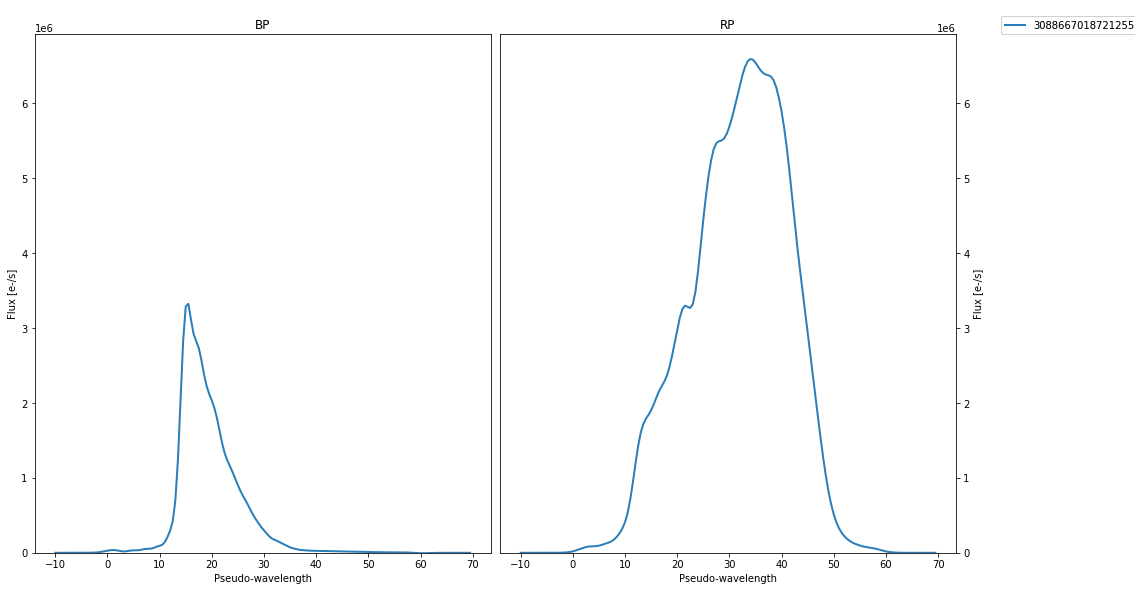

In [ ]:
from gaiaxpy import plot_spectra
# multi allows the spectra to appear in the same canvas
plot_spectra(converted_spectra, sampling=custom_sampling, multi=True)